## Step 1: Load & Clean the Data

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load dataset
df = pd.read_excel("/Users/rasel/Library/CloudStorage/OneDrive-Aarhusuniversitet/Customer Churn Analysis/E Commerce Dataset.xlsx", sheet_name="E Comm")
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [4]:
df.shape

(5630, 20)

In [5]:
## Remove non-predictive ID
df = df.drop(columns=['CustomerID'])

In [6]:
# Split target (Churn) and features (Other Columns)
target = "Churn"
X = df.drop(columns=[target])
y = df[target]

In [7]:
# Display the class (data type) of each column in the dataframe X
X.dtypes

Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [8]:
# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()

## Step 2: Handle Missing Values

In [9]:
# Impute numerical columns with median
num_imputer = SimpleImputer(strategy="median")
X[numeric_cols] = num_imputer.fit_transform(X[numeric_cols])

In [10]:
# Impute categorical columns with most frequent
cat_imputer = SimpleImputer(strategy="most_frequent")
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

## Step 3: Encode Categorical Variables

In [11]:
encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

## Step 4: Feature Engineering

In [12]:
# Add RFM (Recency, Frequency, Monetary)
X["Recency"] = X["DaySinceLastOrder"]              # how recent
X["Frequency"] = X["OrderCount"]                   # how often
X["Monetary"] = X["CashbackAmount"]                # how much spent/received

In [13]:
# Engagement score = usage time + device activity
X["EngagementScore"] = (
    X["HourSpendOnApp"] * 0.6 +
    X["NumberOfDeviceRegistered"] * 0.4
)

In [14]:
# Complaint ratio = complaints per number of addresses
X["ComplaintRatio"] = X["Complain"] / (X["NumberOfAddress"] + 1e-5)  # to avoid division by zero

In [15]:
# Combine final dataset
df_final = X.copy()
df_final[target] = y
processed_churn_dataset = df_final
processed_churn_dataset.to_csv("processed_churn_dataset.csv", index=False)

print("Final shape:", df_final.shape)

Final shape: (5630, 24)


## Step 5.1 Random Forrest

In [16]:
# Load the processed churn dataset
df = pd.read_csv("processed_churn_dataset.csv")
df.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Recency,Frequency,Monetary,EngagementScore,ComplaintRatio,Churn
0,4.0,1,3.0,6.0,4,0,3.0,3.0,2,2.0,...,1.0,1.0,5.0,159.93,5.0,1.0,159.93,3.0,0.111111,1
1,9.0,2,1.0,8.0,6,1,3.0,4.0,3,3.0,...,0.0,1.0,0.0,120.90,0.0,1.0,120.90,3.4,0.142857,1
2,9.0,2,1.0,30.0,4,1,2.0,4.0,3,3.0,...,0.0,1.0,3.0,120.28,3.0,1.0,120.28,2.8,0.166666,1
3,0.0,2,3.0,15.0,4,1,2.0,4.0,2,5.0,...,0.0,1.0,3.0,134.07,3.0,1.0,134.07,2.8,0.000000,1
4,0.0,2,1.0,12.0,0,1,3.0,3.0,3,5.0,...,1.0,1.0,3.0,129.60,3.0,1.0,129.60,3.0,0.000000,1


In [17]:
# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [18]:
from sklearn.model_selection import train_test_split

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [19]:
from sklearn.preprocessing import StandardScaler

# 2. Standard Scaling (mostly useful for non-tree models) So it is optional
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 3. Define Random Forest with basic grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

In [21]:
# 4. Train model
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [24]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# 5. Evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
y_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("AUC Score:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
AUC Score: 0.9986729644624381
Confusion Matrix:
 [[933   3]
 [ 15 175]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       936
           1       0.98      0.92      0.95       190

    accuracy                           0.98      1126
   macro avg       0.98      0.96      0.97      1126
weighted avg       0.98      0.98      0.98      1126



In [25]:
import joblib
joblib.dump(best_rf, "best_random_forest_model.pkl")

['best_random_forest_model.pkl']

## Step 5.2 Train XGBoost with EarlyStopping

In [27]:
# Install xgboost if not already installed
%pip install xgboost

import xgboost as xgb
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
# 1. Prepare data
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dvalid = xgb.DMatrix(X_test_scaled, label=y_test)

In [29]:
# 2. Define params
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "scale_pos_weight": len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # handle imbalance
    "seed": 42,
}

In [30]:
# 3. Train with early stopping
evals = [(dtrain, "train"), (dvalid, "eval")]
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=10
)

[0]	train-auc:0.89215	eval-auc:0.83314
[10]	train-auc:0.95968	eval-auc:0.93226
[20]	train-auc:0.96875	eval-auc:0.94223
[30]	train-auc:0.97480	eval-auc:0.94990
[40]	train-auc:0.97968	eval-auc:0.95697
[50]	train-auc:0.98435	eval-auc:0.96452
[60]	train-auc:0.98696	eval-auc:0.96793
[70]	train-auc:0.98978	eval-auc:0.97250
[80]	train-auc:0.99143	eval-auc:0.97584
[90]	train-auc:0.99341	eval-auc:0.97928
[100]	train-auc:0.99468	eval-auc:0.98169
[110]	train-auc:0.99585	eval-auc:0.98385
[120]	train-auc:0.99695	eval-auc:0.98584
[130]	train-auc:0.99758	eval-auc:0.98726
[140]	train-auc:0.99808	eval-auc:0.98882
[150]	train-auc:0.99855	eval-auc:0.99060
[160]	train-auc:0.99892	eval-auc:0.99214
[170]	train-auc:0.99920	eval-auc:0.99321
[180]	train-auc:0.99943	eval-auc:0.99410
[190]	train-auc:0.99955	eval-auc:0.99464
[200]	train-auc:0.99965	eval-auc:0.99493
[210]	train-auc:0.99972	eval-auc:0.99543
[220]	train-auc:0.99977	eval-auc:0.99598
[230]	train-auc:0.99982	eval-auc:0.99626
[240]	train-auc:0.99987	eva

In [31]:
# 4. Predict
y_pred_proba = xgb_model.predict(dvalid)
y_pred = (y_pred_proba > 0.5).astype(int)

In [32]:
# 5. Evaluate
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

AUC Score: 0.9991902834008097
Confusion Matrix:
 [[927   9]
 [  6 184]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.95      0.97      0.96       190

    accuracy                           0.99      1126
   macro avg       0.97      0.98      0.98      1126
weighted avg       0.99      0.99      0.99      1126



In [35]:
# 6. Save model
xgb_model.save_model("best_xgboost_model.json")
print("XGBoost model saved as 'best_xgboost_model.json'")

XGBoost model saved as 'best_xgboost_model.json'


## SHAP Analysis for XGBoost (Global + Local)

In [36]:
# Install shap if not already installed
%pip install shap

import shap
import xgboost as xgb
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [38]:
# 1. Load model (if not already in memory)
model = xgb.Booster()
model.load_model("/Users/rasel/Library/CloudStorage/OneDrive-Aarhusuniversitet/Customer Churn Analysis/best_xgboost_model.json")

In [39]:
# 2. Prepare SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

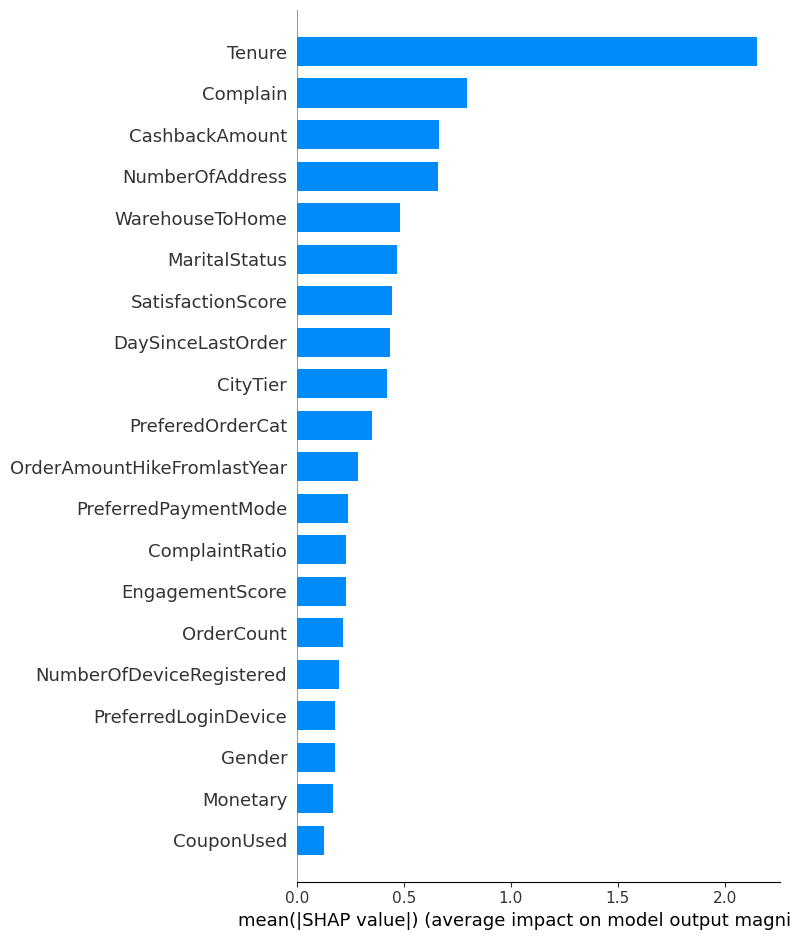

In [40]:
# 3. Global Summary Plot (most important features overall)
shap.summary_plot(shap_values, X_test, plot_type="bar")

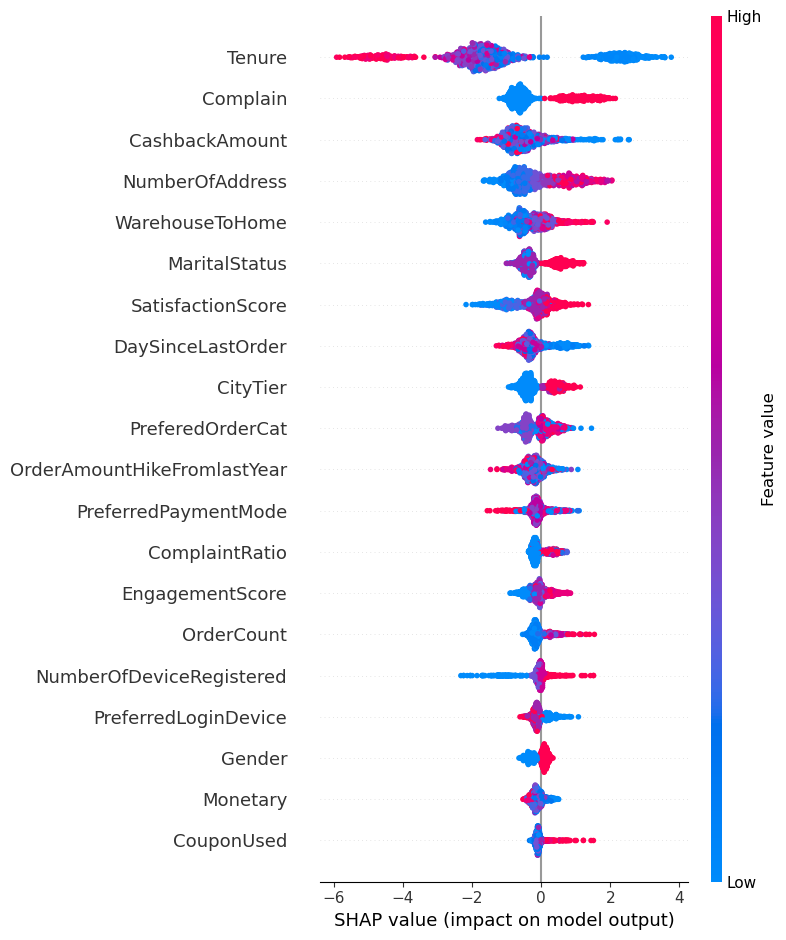

In [41]:
# 4. Detailed Feature Impact (beeswarm)
shap.summary_plot(shap_values, X_test)

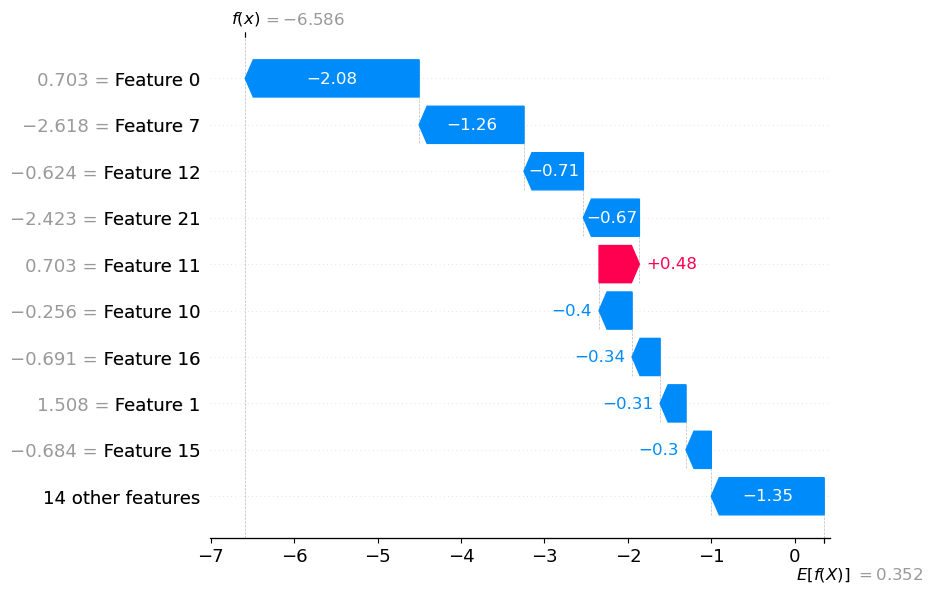

In [42]:
# 5. Explain a single customer
index = 10  # choose any customer index
shap.plots.waterfall(shap_values[index])